<a href="https://colab.research.google.com/github/filipefelisardo/Clepsydra/blob/main/precipitacoes_2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               DATA  ABRANTES (17H/01C)  ALBUFEIRA DE PEGO DO ALTAR (23G/01F)  \
0  01/01/2009 09:00                85.1                                   NaN   
1  01/02/2009 09:00                64.1                                   NaN   
2  01/03/2009 09:00                 8.7                                   NaN   
3  01/04/2009 09:00                28.0                                  26.9   
4  01/05/2009 09:00                24.5                                  65.8   

   ALBUFEIRA DO ROXO (26I/02F)  ALCÁÇOVAS (23I/01C)  \
0                          NaN                111.4   
1                          NaN                 56.9   
2                          NaN                 25.9   
3                          NaN                 23.8   
4                          3.3                 18.9   

   BARRAGEM DE MAGOS (20E/01C)  BARRAGEM DE MEIMOA (12O/04C)  \
0                          NaN                           NaN   
1                         71.4                        

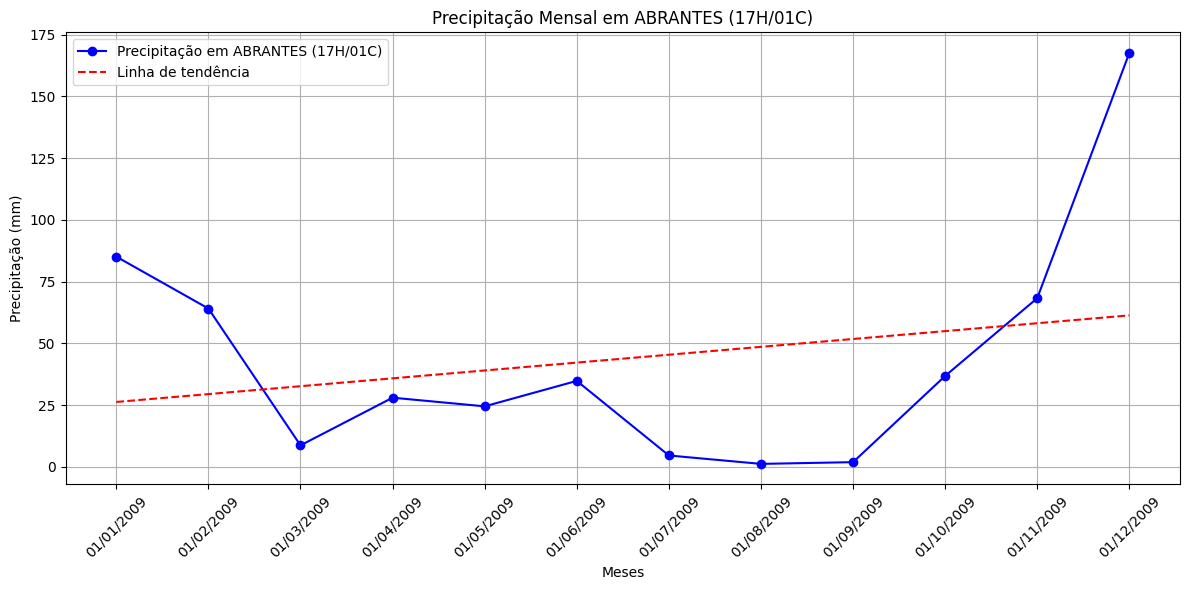

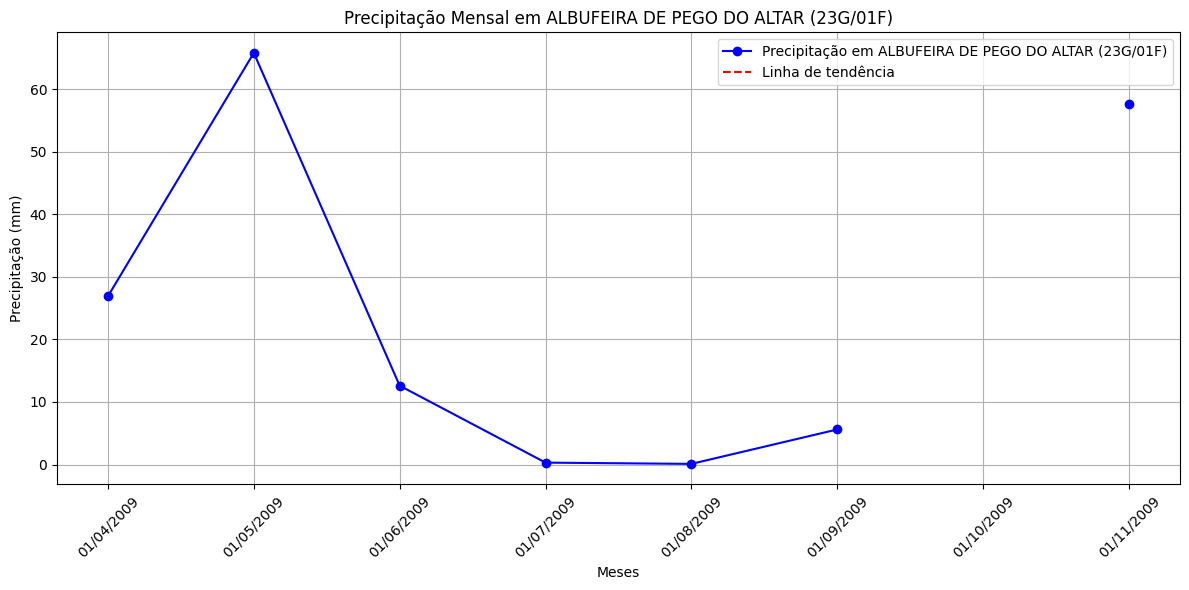

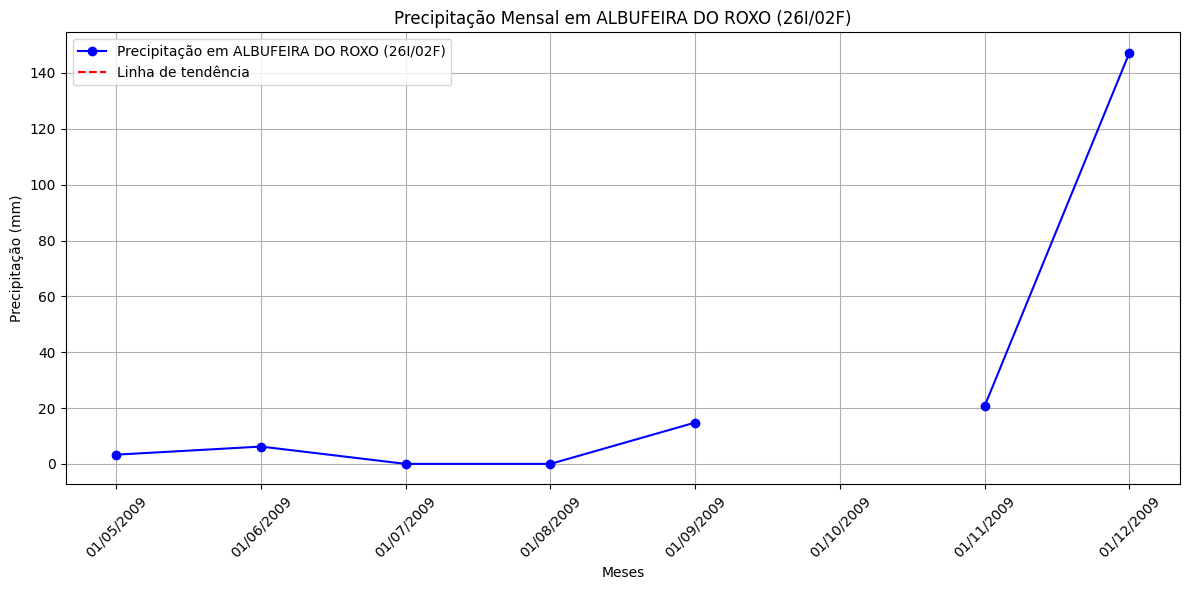

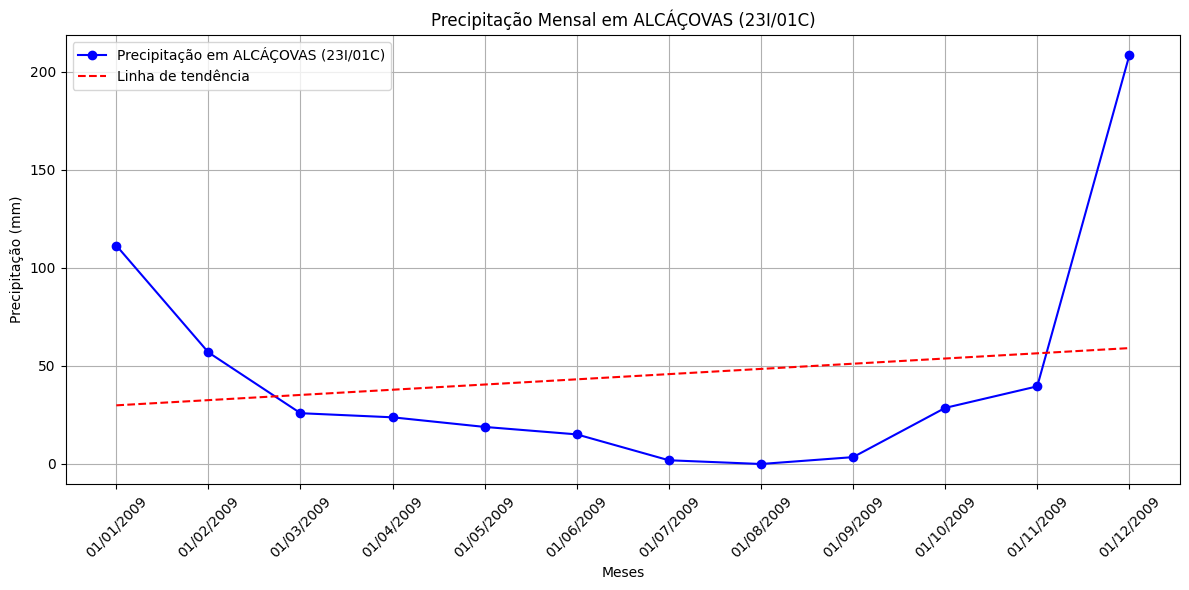

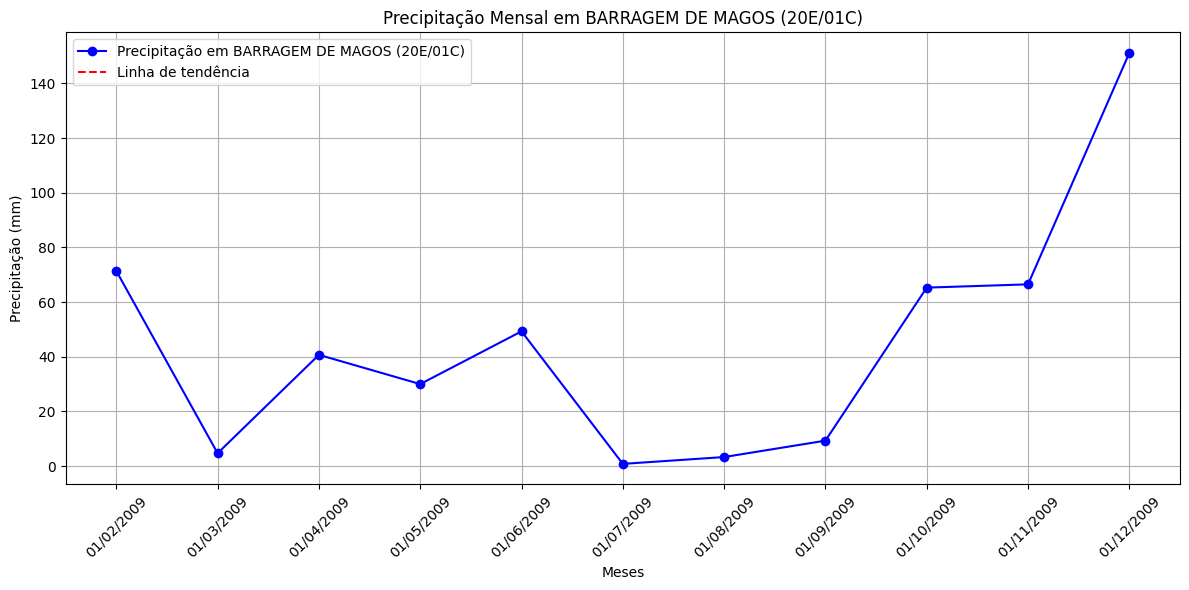

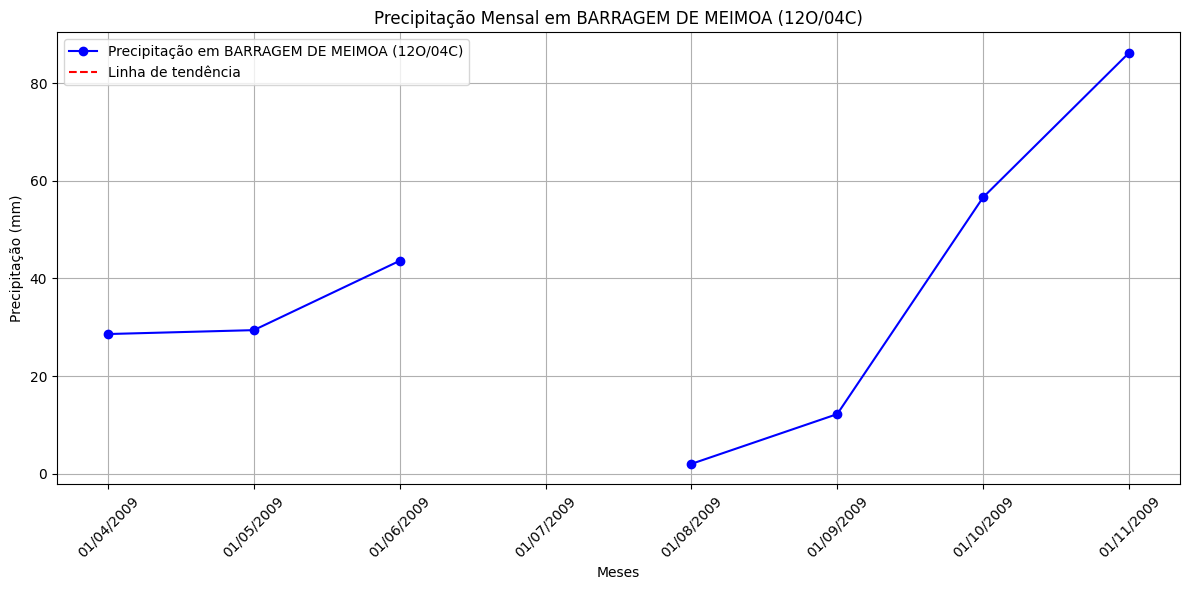

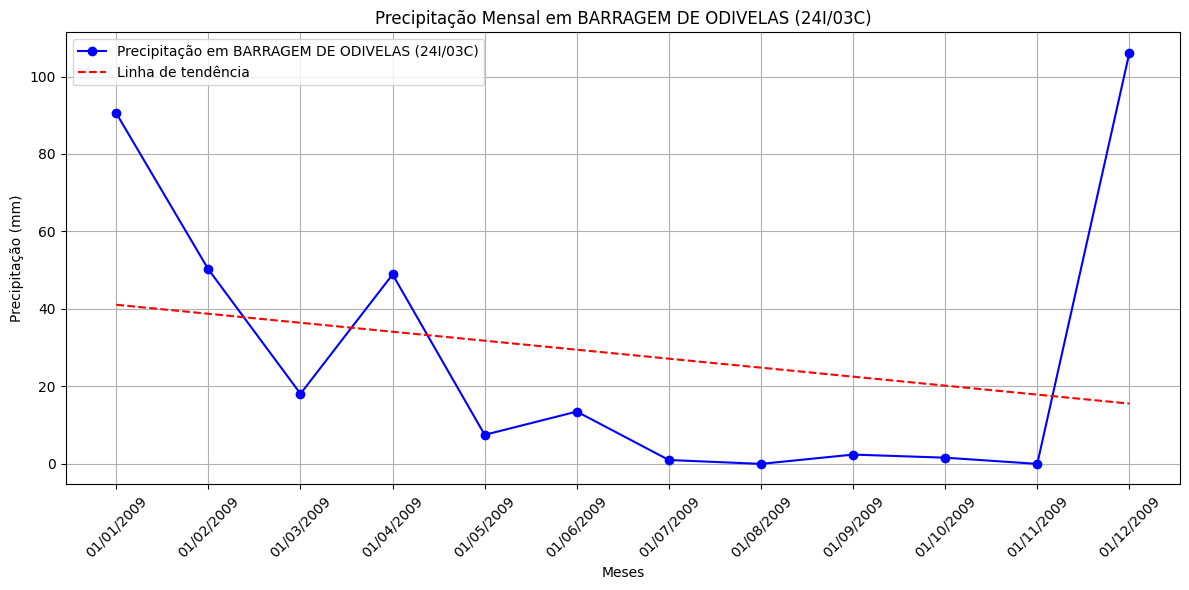

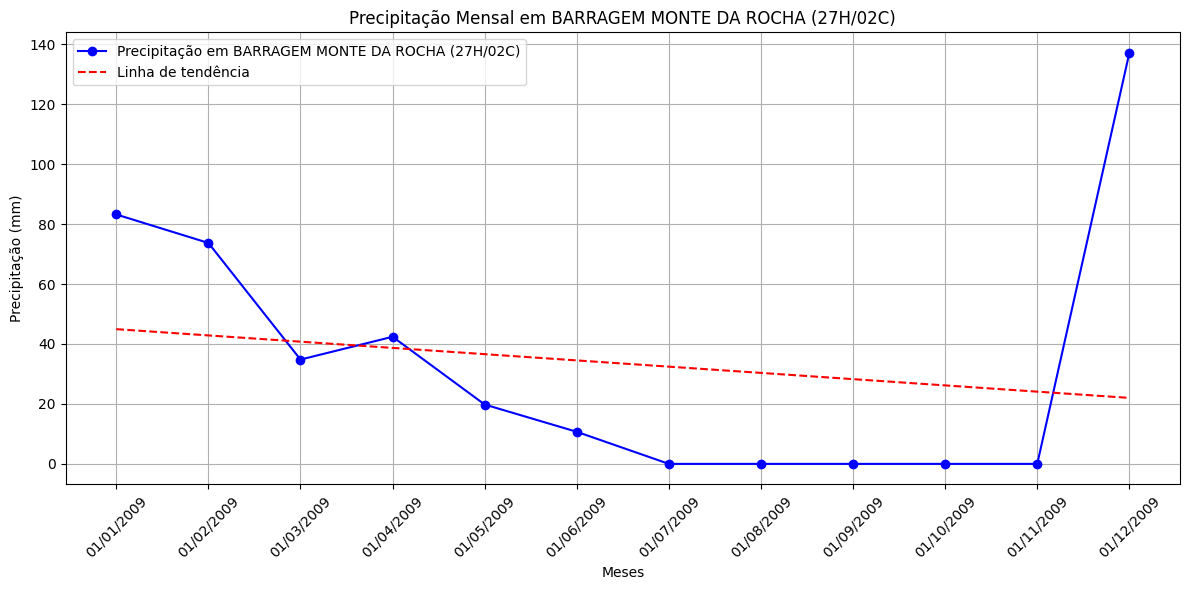

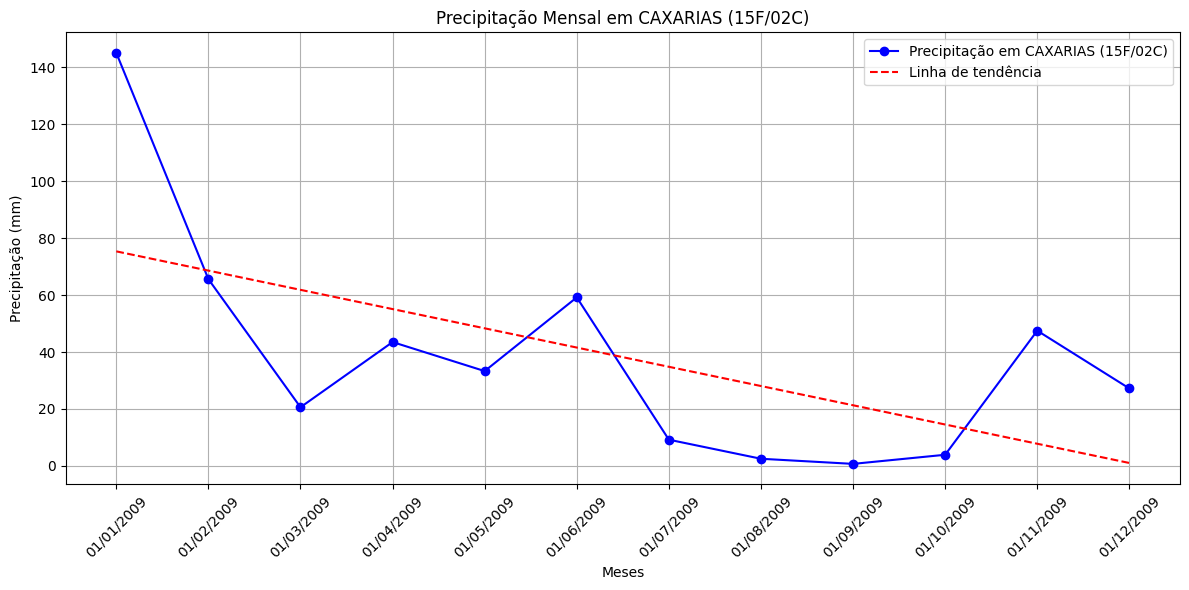

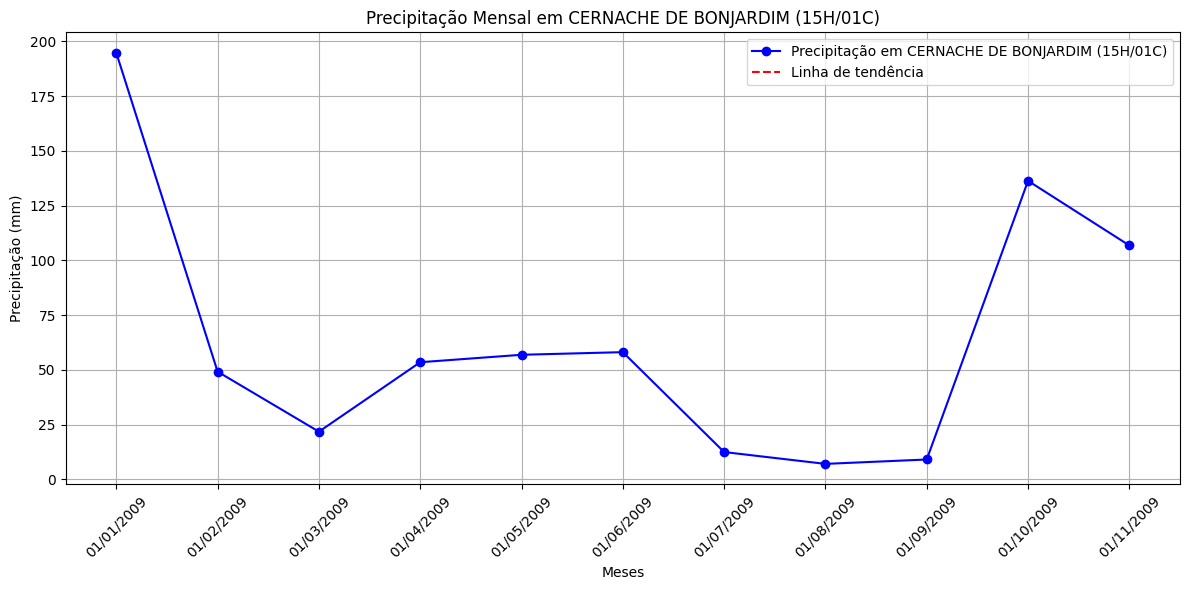

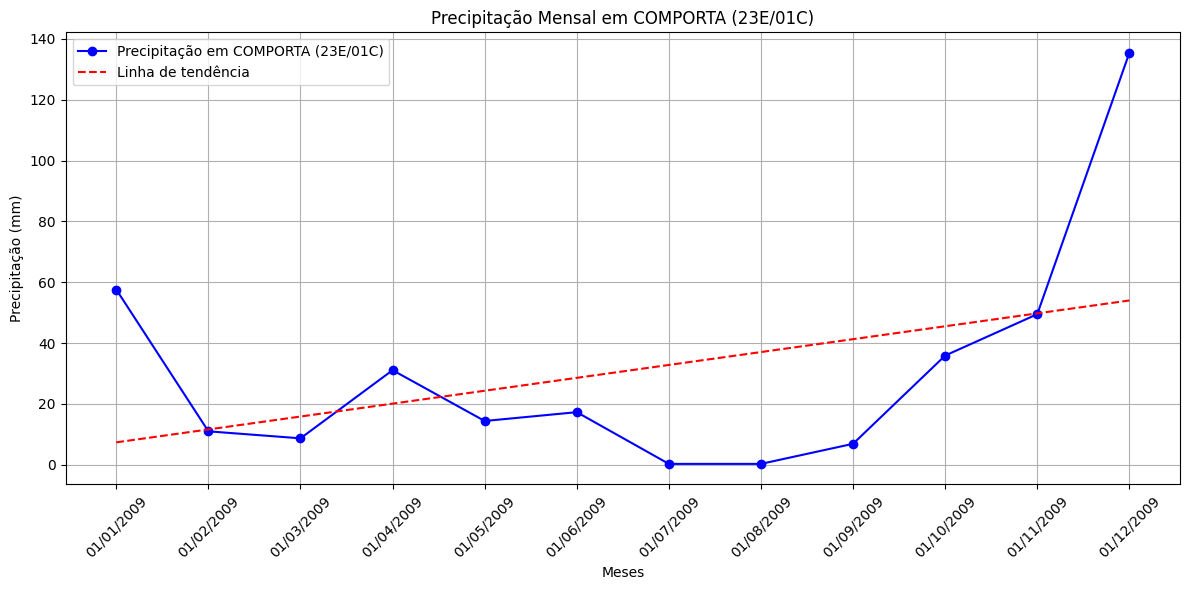

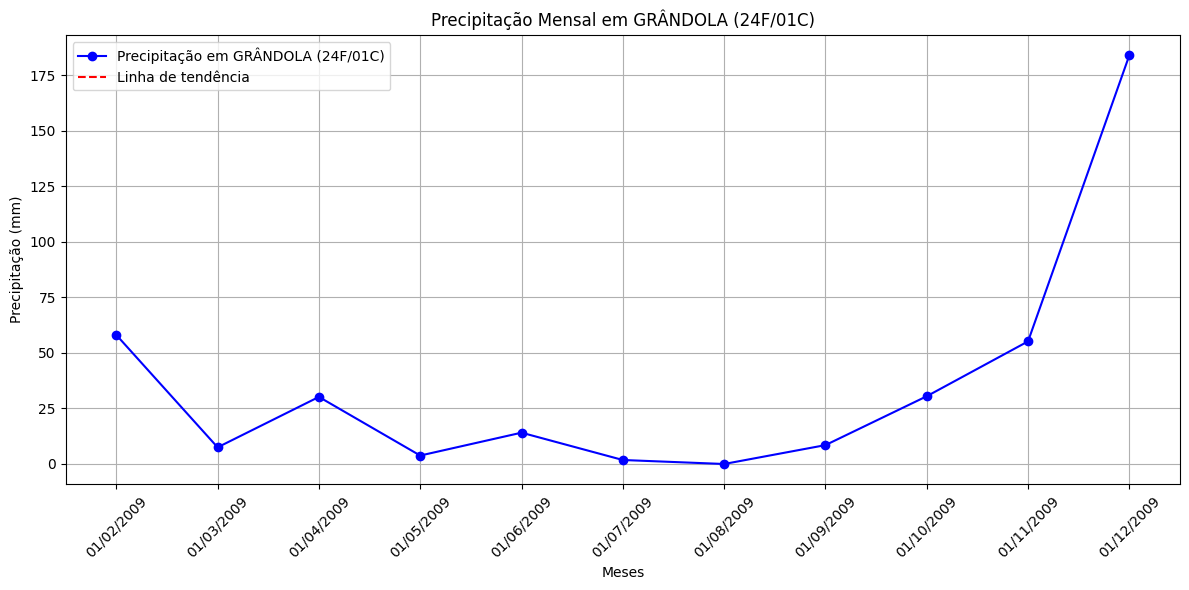

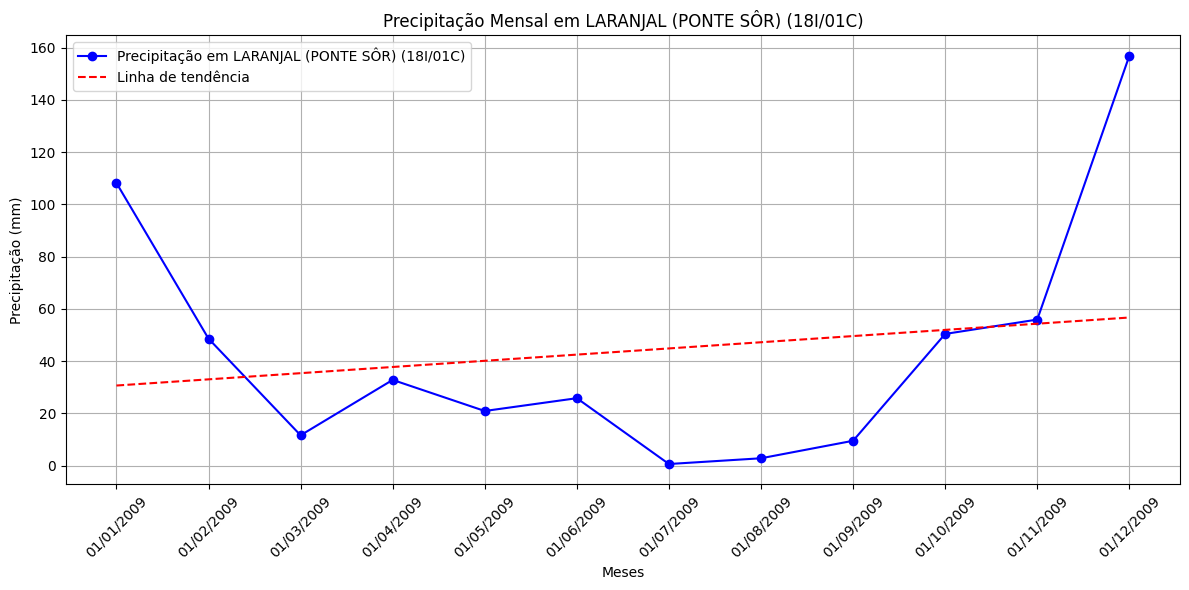

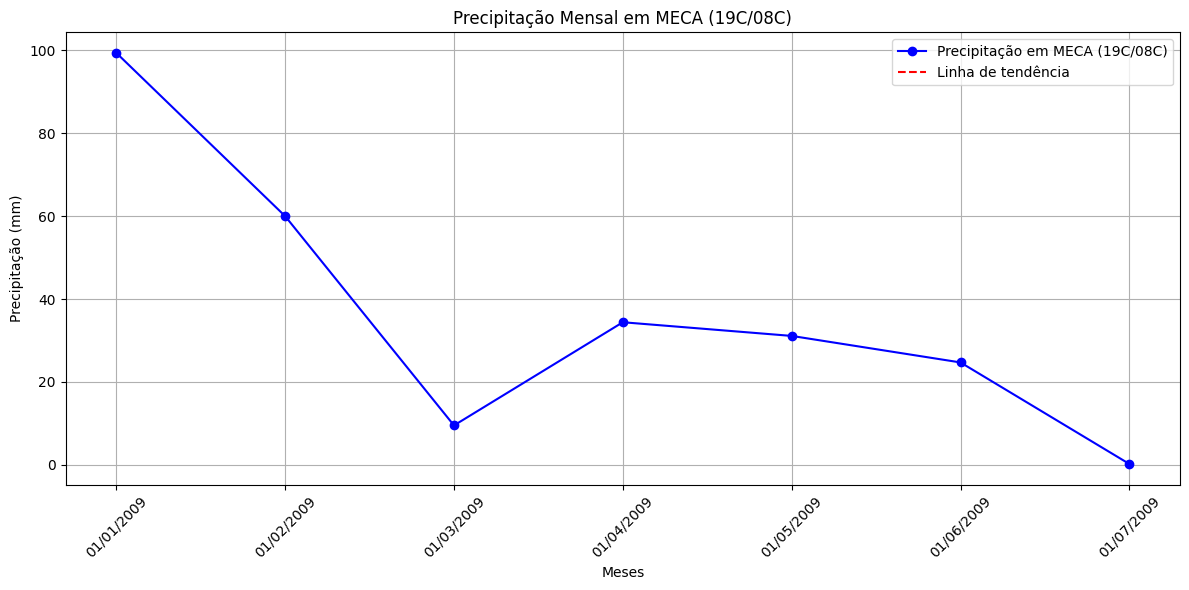

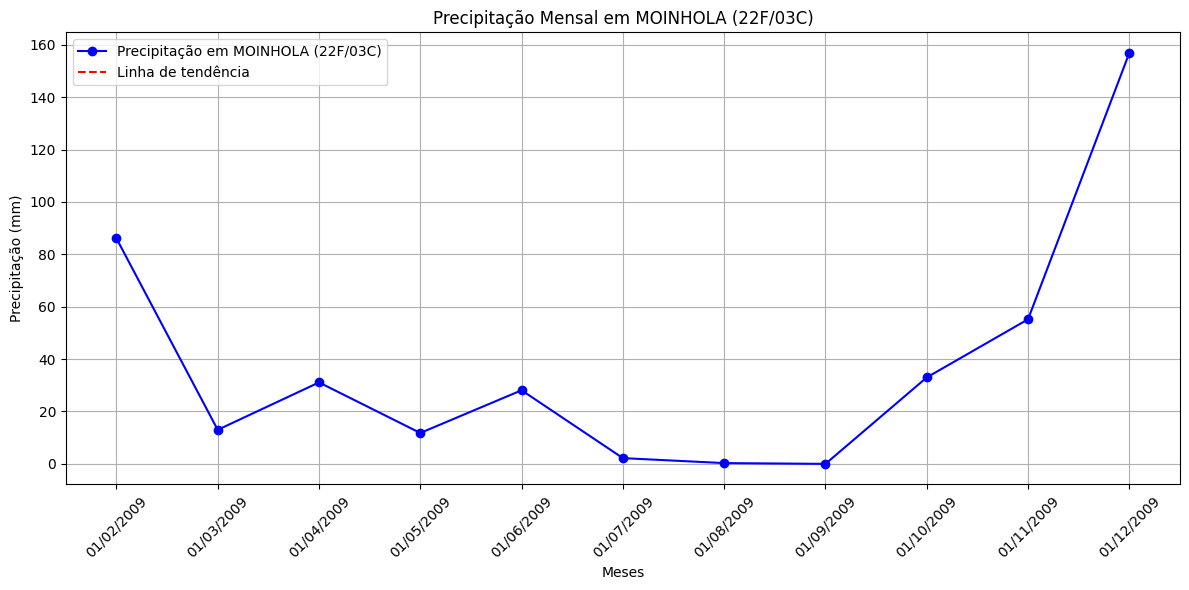

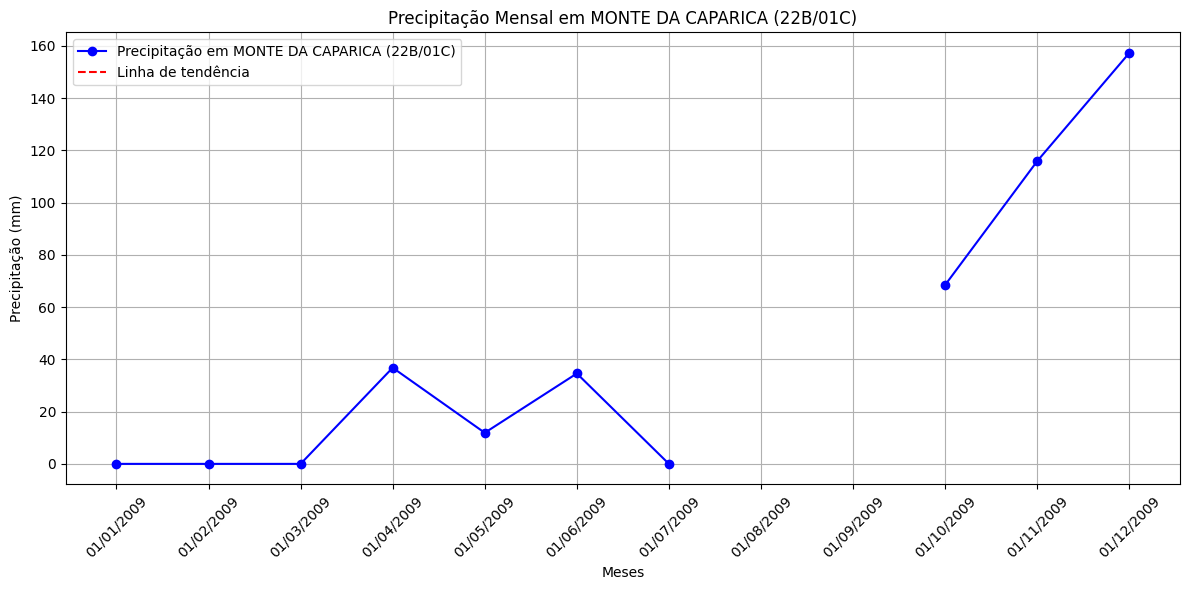

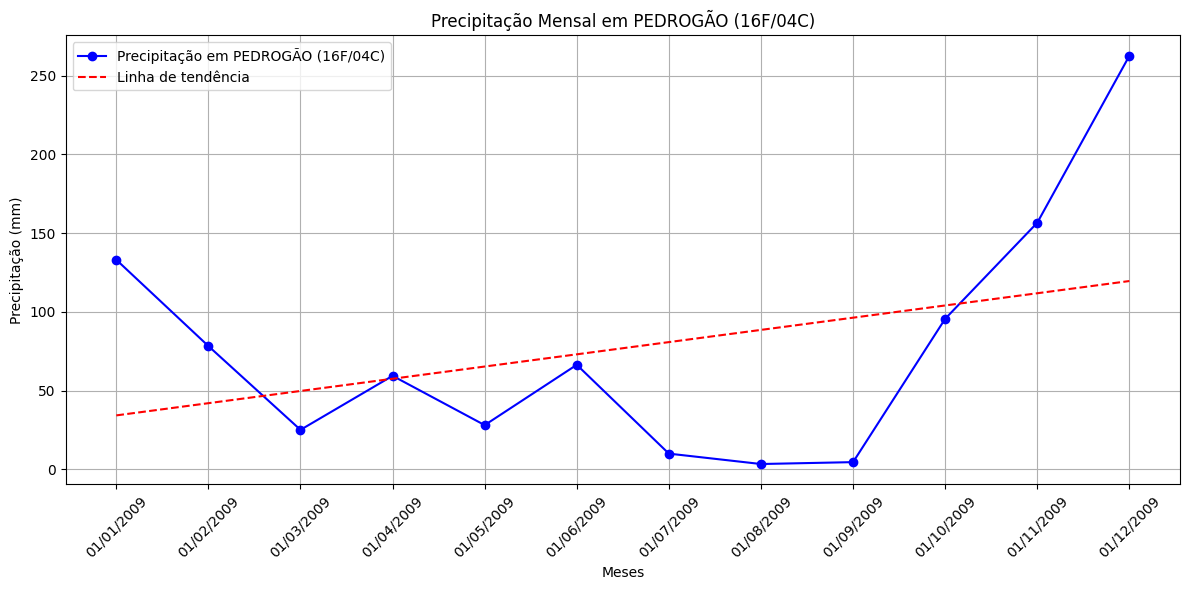

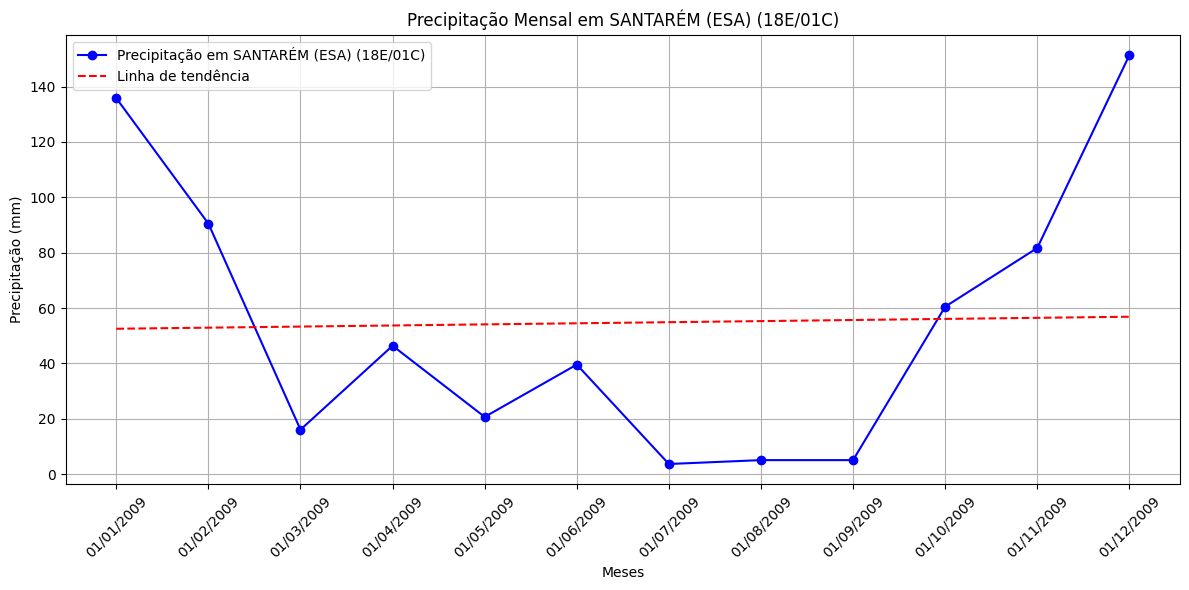

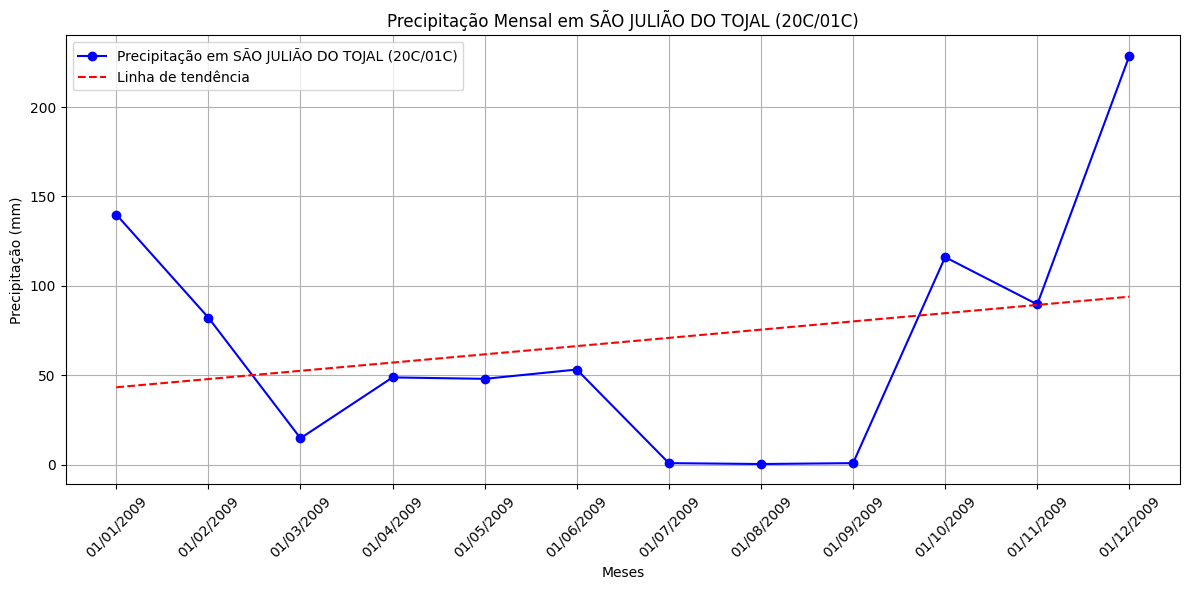

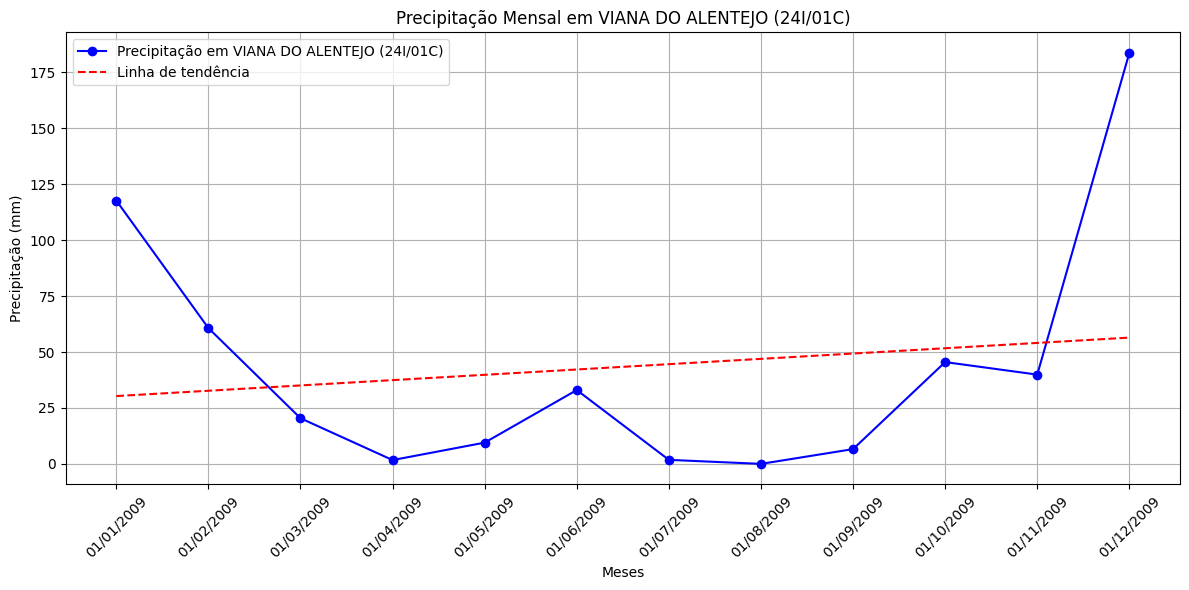

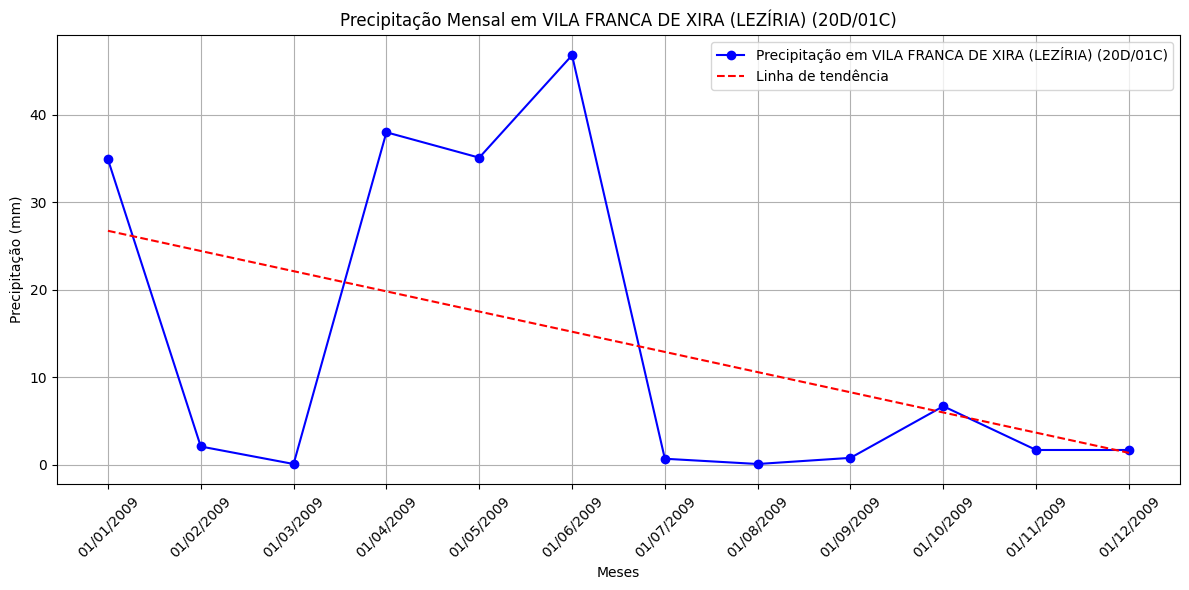

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo CSV
file_path = 'precipitacoes_mensais_2009.xlsx'  # Atualize para o caminho correto do seu arquivo
df = pd.read_excel(file_path)

# Verificar as primeiras linhas do dataframe para entender a estrutura dos dados
print(df.head())

# Assumindo que a primeira coluna contém os meses e as outras colunas são estações
df['DATA'] = df['DATA'].str[:10]  # Extraindo apenas a data
df.set_index('DATA', inplace=True)

# Verificar o índice e colunas do dataframe
print(df.index)
print(df.columns)

# Função para adicionar linha de tendência
def add_trendline(ax, x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='r', label='Linha de tendência')

# Plotar gráficos de precipitação para cada estação
for column in df.columns:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df.index))
    y = df[column].astype(float).values
    plt.plot(df.index, y, label=f'Precipitação em {column}', color='b', linestyle='-', marker='o')

    # Adicionar linha de tendência
    ax = plt.gca()
    add_trendline(ax, x, y)

    plt.title(f'Precipitação Mensal em {column}')
    plt.xlabel('Meses')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
